# Phase 1 Code Challenge Review 

_September 23, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import data from a file ## how do you read into a df?
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

In [3]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# examine the dimensions of it #150 rows, 5 columns
df.shape

(150, 5)

In [5]:
# check to see if you have missing values ## .isna is the same as .isnull
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.isnull().sum().any()

False

In [7]:
# introduce some missing values -- this is already done for us
df.iloc[2,1:3] = np.nan

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,NaN,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# drop them (the missing values)
df = df.dropna(axis = 0) 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [11]:
df = df.dropna(subset = ['sepal_width'], axis = 0) ## add inplace = True inside parentheses to not modify the original?
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [12]:
# drop them (the missing values) (drop a row)
df = df.dropna(axis = 0) ## axis says we're dropping row 0
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [13]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
##this is called vectorizing
df['sepal_length_10'] = df.sepal_length * 10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0


In [14]:
df['sepal_length_10_lamb'] = df.sepal_length.map(lambda x:x*10) ##creating new column named sepal length 10 lamb
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lamb
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


In [15]:
## extra credit applying map
df_all_string = df.applymap(lambda x:str(x)) ##can also use df.applymap(str) instead of lambda
df_all_string.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 7 columns):
sepal_length            149 non-null object
sepal_width             149 non-null object
petal_length            149 non-null object
petal_width             149 non-null object
species                 149 non-null object
sepal_length_10         149 non-null object
sepal_length_10_lamb    149 non-null object
dtypes: object(7)
memory usage: 9.3+ KB


In [16]:
## extra - use applymap to multipy everything by 10 if it is a float
df_by_10 = df.applymap(lambda x:x*10 if type(x) == float else x)
df_by_10.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lamb
0,51.0,35.0,14.0,2.0,setosa,510.0,510.0
1,49.0,30.0,14.0,2.0,setosa,490.0,490.0
3,46.0,31.0,15.0,2.0,setosa,460.0,460.0
4,50.0,36.0,14.0,2.0,setosa,500.0,500.0
5,54.0,39.0,17.0,4.0,setosa,540.0,540.0


#### 2. Data Visualization

In [17]:
#how many species are there and how many observations are in each species (can use groupby)
df.species.value_counts()

virginica     50
versicolor    50
setosa        49
Name: species, dtype: int64

In [18]:
# let's plot the average pedal length for each species of iris 
## creating appropriate queries 
## let's create a bar plot x- species, y- avg length

y = df.groupby(['species'])['petal_length'].mean()
x = y.index

In [19]:
y

species
setosa        1.465306
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

Text(0, 0.5, 'avg length')

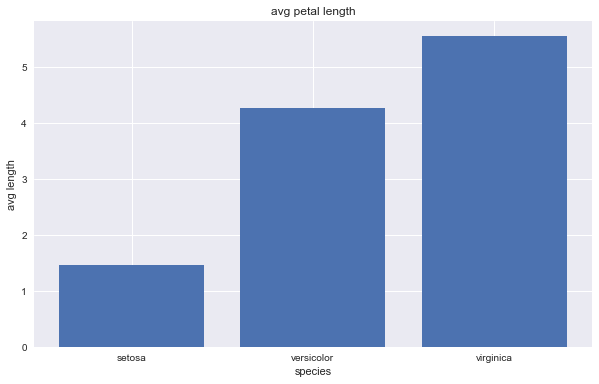

In [20]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_xlabel('species')
ax.set_ylabel('avg length')

<BarContainer object of 4 artists>

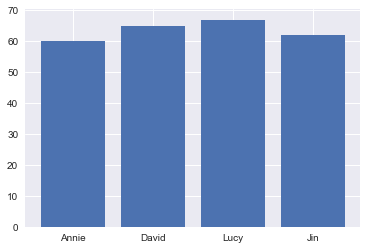

In [21]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)

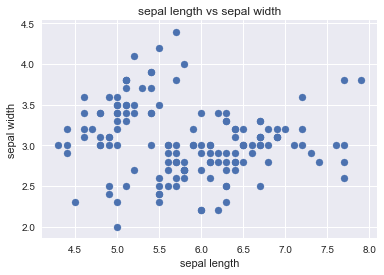

In [22]:
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

In [23]:
## what is the relationship of the above graph? - answer in correlation to describe 
## -- also confirm or deny by visually examining a scatter plot

In [24]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lamb
sepal_length,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_width,-0.115303,1.000000,-0.428329,-0.365487,-0.115303,-0.115303
petal_length,0.870066,-0.428329,1.000000,0.962424,0.870066,0.870066
petal_width,0.815701,-0.365487,0.962424,1.000000,0.815701,0.815701
sepal_length_10,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_length_10_lamb,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [25]:
# calculate the mean and median value for sepal length 

df.sepal_length.agg(['mean', 'median'])


mean      5.851007
median    5.800000
Name: sepal_length, dtype: float64

In [26]:
# calculate the mean and median value for sepal length 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_lamb
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.851007,3.056376,3.774497,1.206040,58.510067,58.510067
std,0.825491,0.437178,1.759613,0.760354,8.254906,8.254906
min,4.300000,2.000000,1.000000,0.100000,43.000000,43.000000
25%,5.100000,2.800000,1.600000,0.300000,51.000000,51.000000
50%,5.800000,3.000000,4.400000,1.300000,58.000000,58.000000
75%,6.400000,3.300000,5.100000,1.800000,64.000000,64.000000
max,7.900000,4.400000,6.900000,2.500000,79.000000,79.000000


In [27]:
df.sepal_length.mean()

5.851006711409395

In [28]:
df.sepal_length.median()

5.8

In [29]:
df[['sepal_length', 'sepal_width'].agg(['mean', 'median'])]

AttributeError: 'list' object has no attribute 'agg'

In [ ]:
# what can you say about the distribution of sepal length 
# and sepal width based on this distribution?

In normal distribution, mean and median are the same.
Median will larger than the mean if data is skued to the right.
Median will smaller than the mean if data is skued to the left.
Skinny tail means you have more outliers.

if mean and median are very close, the curve will be close to symmetrical

In [30]:
# which flower has the longest pedal? what is the species of that flower
df.groupby(['species'])['petal_length'].max()

species
setosa        1.9
versicolor    5.1
virginica     6.9
Name: petal_length, dtype: float64

In [31]:
# which flower has the longest pedal? what is the species of that flower
df.sort_values(by = 'petal_length', ascending = False).head(1)


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lamb
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


In [32]:
# which flower has the longest pedal? what is the species of that flower
## where in the observation is this info?
df.petal_length.max()
df[df['petal_length'] == df.petal_length.max()]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_lamb
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


#### 4. Python Data Structure 

In [33]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]}]
}    

In [34]:
len(groomer_info['pets'][0])

4

In [83]:
# create a list of names containing all pets' names
## for loop
## going into groomer_info dict, then pets dict, looking for first (0?) key in each pets dict

names = []
for name in groomer_info['pets'][0].keys():
    names.append(name)
print(names)

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']


In [62]:
names = list(groomer_info['pets'][0].keys())
names

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [44]:
# how do I get a pets age?
groomer_info['pets'][0]['Ginger'][0]['age']

5

In [52]:
groomer_info['pets'][0]['Ginger'][0]['attribute'][0]

'Playful'

In [53]:
#how do I get pets type
print(groomer_info['pets'][0]['Ginger'][0]['type'])                                
print(groomer_info['pets'][0]['Chloe'][0]['type'])

Pitbull
Maine Coon


In [73]:
# loop through the collection, create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']

## going into groomer_info dict, then pets dict, then each name (0?), then type value
##with one for loop
names = list(groomer_info['pets'][0].keys()) ##pulled list from earlier solves
ty = []
for i in names:
    ty.append(groomer_info['pets'][0][i][0]['type'])
print(ty)

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']


In [79]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare

names = list(groomer_info['pets'][0].keys()) ##pulled list from earlier solves

def pets_older_than(groomer_info, age):
    old_pets = []
    for name in names:
        if groomer_info['pets'][0][name][0]['age']>age:
            old_pets.append(name)
    return old_pets

In [80]:
pets_older_than(groomer_info, 5)

['Chuck Norris']